In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [11]:
# Step 1: Load your data
file_path = 'Core plug dataset.csv'  # Change to your file's path
data = pd.read_csv(file_path)

In [12]:
# Step 2: Select the features for clustering
X = data[['Porosity', 'Air Permability (md), Kair@323 (K)']]

In [13]:
# Step 3: Determine the optimal number of clusters using the Elbow method
wcss = []
for k in range(1, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mohammad\AppData\Roaming\Python\Python311\site-packages\sklea

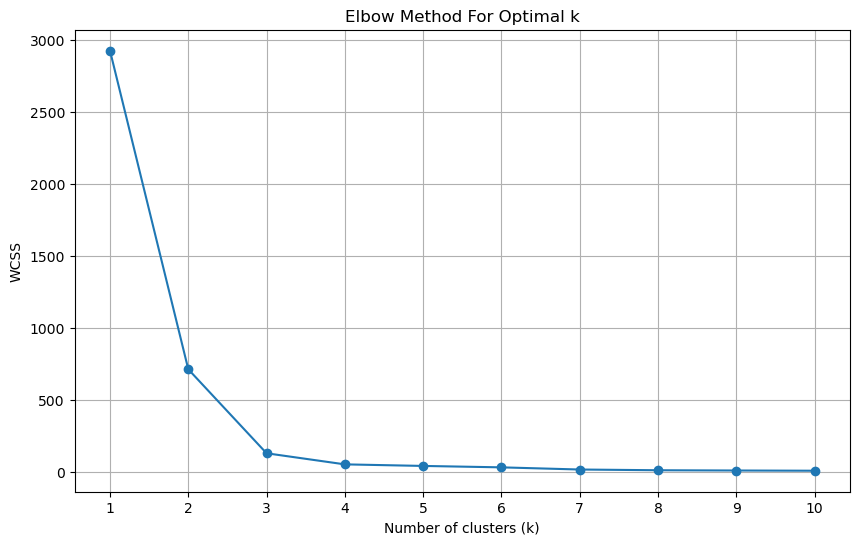

In [14]:
# Step 4: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [15]:
# Step 5: Fit KMeans with the optimal number of clusters
optimal_k = 3  # Change this to your chosen number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

C:\Users\Mohammad\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


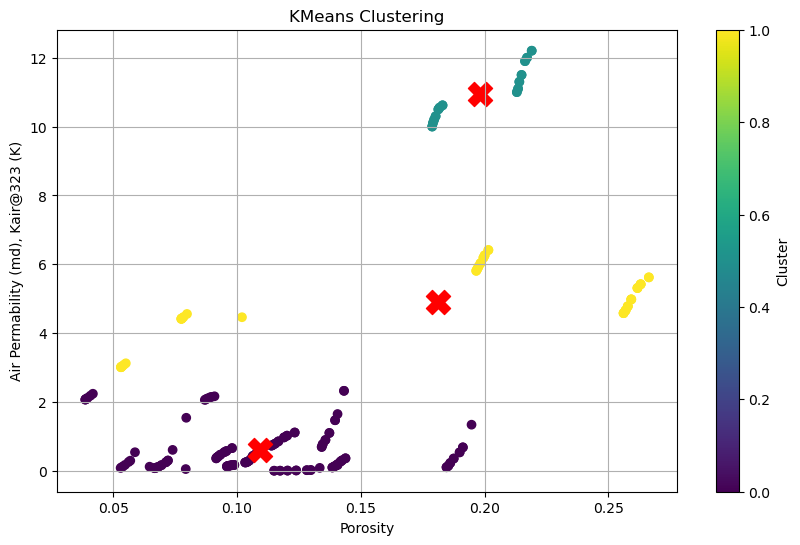

In [16]:
# Step 6: Visualize the clustered data K = 3
plt.figure(figsize=(10, 6))
plt.scatter(data['Porosity'], data['Air Permability (md), Kair@323 (K)'], c=data['Cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Plot cluster centers
plt.title('KMeans Clustering')
plt.xlabel('Porosity')
plt.ylabel('Air Permability (md), Kair@323 (K)')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

In [18]:
# Step 7: Save rock types by cluster to a new CSV file
# Make sure your original data has a column named 'Rock Type'
output_file_path = 'rock_types_by_3_kind_cluster.csv'  # Desired output file path
data[['Rock Type', 'Cluster']].to_csv(output_file_path, index=False)

In [19]:
################ SVM #################

Confusion Matrix:
 [[29  0  0]
 [ 0  7  0]
 [ 2  0  8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89        10

    accuracy                           0.96        46
   macro avg       0.98      0.93      0.95        46
weighted avg       0.96      0.96      0.95        46



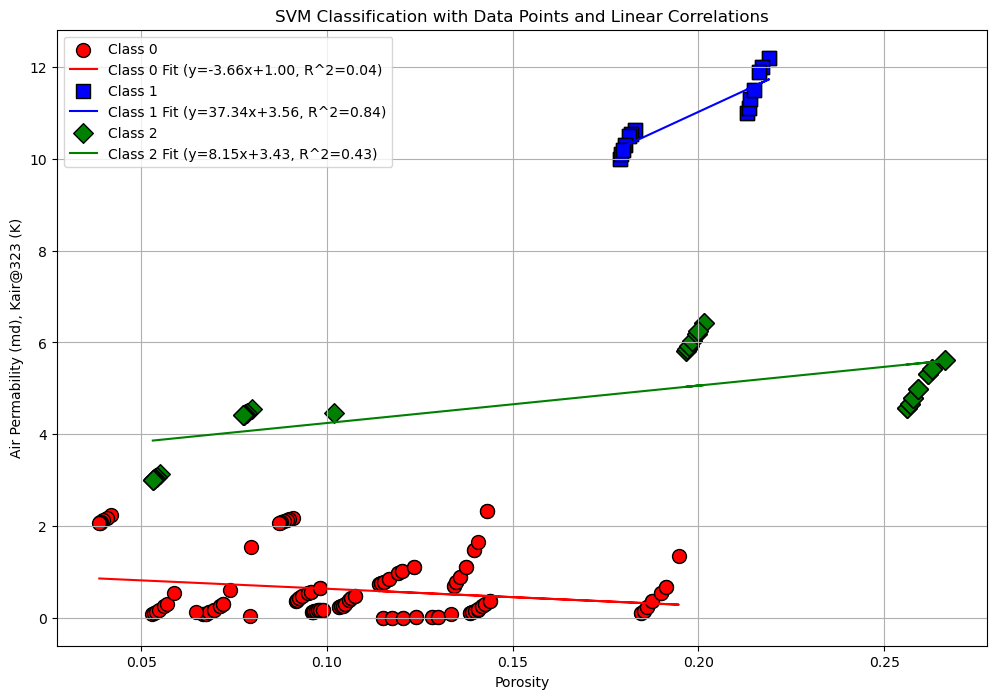

In [20]:
# Linear SVM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# Step 1: Load your data
file_path = 'Core plug dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 2: Check and prepare the dataset
# Ensure 'Rock Type' is the target variable
if 'Rock Type' not in data.columns:
    raise ValueError("The dataset must have a 'Rock Type' column for classification.")

# Select features and target variable
X = data[['Porosity', 'Air Permability (md), Kair@323 (K)']]
y = data['Rock Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train SVM Classifier
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred = svm_classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot data points with linear correlations
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', '^']

# Plot original data points and linear regression for each cluster
for i, class_index in enumerate(np.unique(y)):
    mask = y == class_index
    porosity = X.loc[mask, 'Porosity']
    permeability = X.loc[mask, 'Air Permability (md), Kair@323 (K)']
    
    # Scatter plot
    plt.scatter(
        porosity,
        permeability,
        color=colors[i], 
        marker=markers[i], 
        edgecolor='k', 
        s=100, 
        label=f"Class {class_index}"
    )
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(porosity, permeability)
    line = slope * porosity + intercept
    plt.plot(porosity, line, color=colors[i], linestyle='-', label=f"Class {class_index} Fit (y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f})")

plt.title('SVM Classification with Data Points and Linear Correlations')
plt.xlabel('Porosity')
plt.ylabel('Air Permability (md), Kair@323 (K)')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix:
 [[29  0  0]
 [ 0  7  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



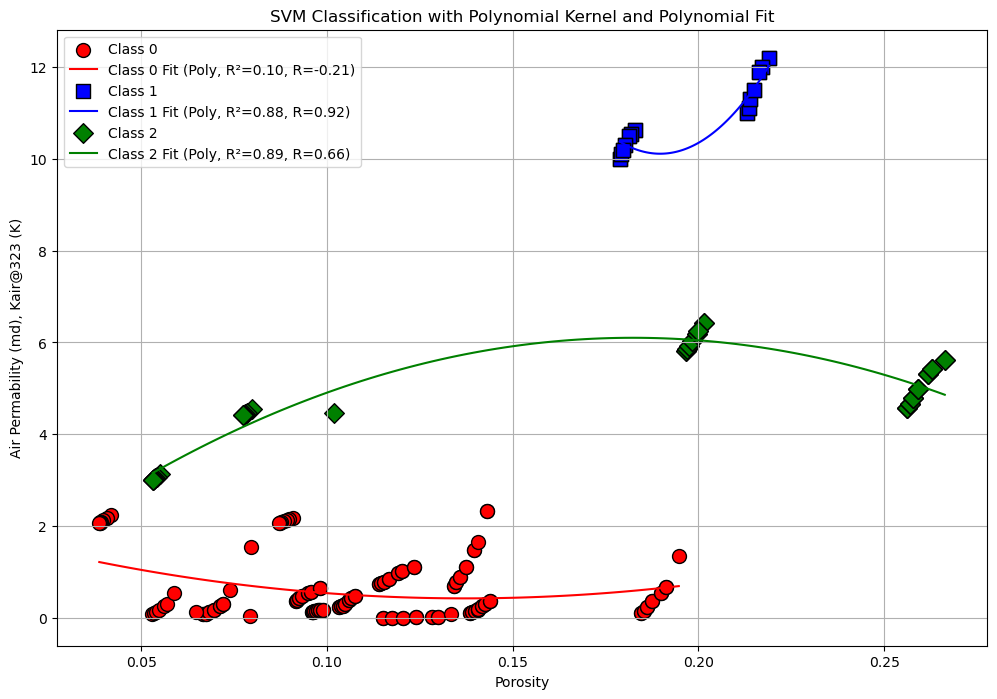

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from numpy.polynomial.polynomial import Polynomial

# Step 1: Load your data
file_path = 'Core plug dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 2: Check and prepare the dataset
# Ensure 'Rock Type' is the target variable
if 'Rock Type' not in data.columns:
    raise ValueError("The dataset must have a 'Rock Type' column for classification.")

# Select features and target variable
X = data[['Porosity', 'Air Permability (md), Kair@323 (K)']]
y = data['Rock Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train SVM Classifier with polynomial kernel
svm_classifier = SVC(kernel='poly', degree=3, decision_function_shape='ovr', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred = svm_classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot data points with polynomial fits
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', '^']

# Plot original data points and polynomial regression for each cluster
for i, class_index in enumerate(np.unique(y)):
    mask = y == class_index
    porosity = X.loc[mask, 'Porosity']
    permeability = X.loc[mask, 'Air Permability (md), Kair@323 (K)']
    
    # Scatter plot
    plt.scatter(
        porosity,
        permeability,
        color=colors[i], 
        marker=markers[i], 
        edgecolor='k', 
        s=100, 
        label=f"Class {class_index}"
    )
    
    # Polynomial fit (degree 2, quadratic) - you can change degree to 3 for cubic
    coeffs = np.polyfit(porosity, permeability, 2)  # 2 for quadratic
    poly = np.poly1d(coeffs)
    
    # Generate points for the polynomial curve
    porosity_range = np.linspace(porosity.min(), porosity.max(), 100)
    permeability_fit = poly(porosity_range)
    
    # Calculate R²
    y_pred_poly = poly(porosity)
    r2 = r2_score(permeability, y_pred_poly)

    # Calculate correlation coefficient (R)
    correlation_matrix = np.corrcoef(porosity, permeability)
    correlation_coefficient = correlation_matrix[0, 1]

    # Add polynomial fit line to plot
    plt.plot(porosity_range, permeability_fit, color=colors[i], linestyle='-', 
             label=f"Class {class_index} Fit (Poly, R²={r2:.2f}, R={correlation_coefficient:.2f})")

plt.title('SVM Classification with Polynomial Kernel and Polynomial Fit')
plt.xlabel('Porosity')
plt.ylabel('Air Permability (md), Kair@323 (K)')
plt.legend()
plt.grid()
plt.show()


In [22]:
########## RQI vs Phi z and classified based on rock types ################

Confusion Matrix:
 [[29  0  0]
 [ 0  7  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



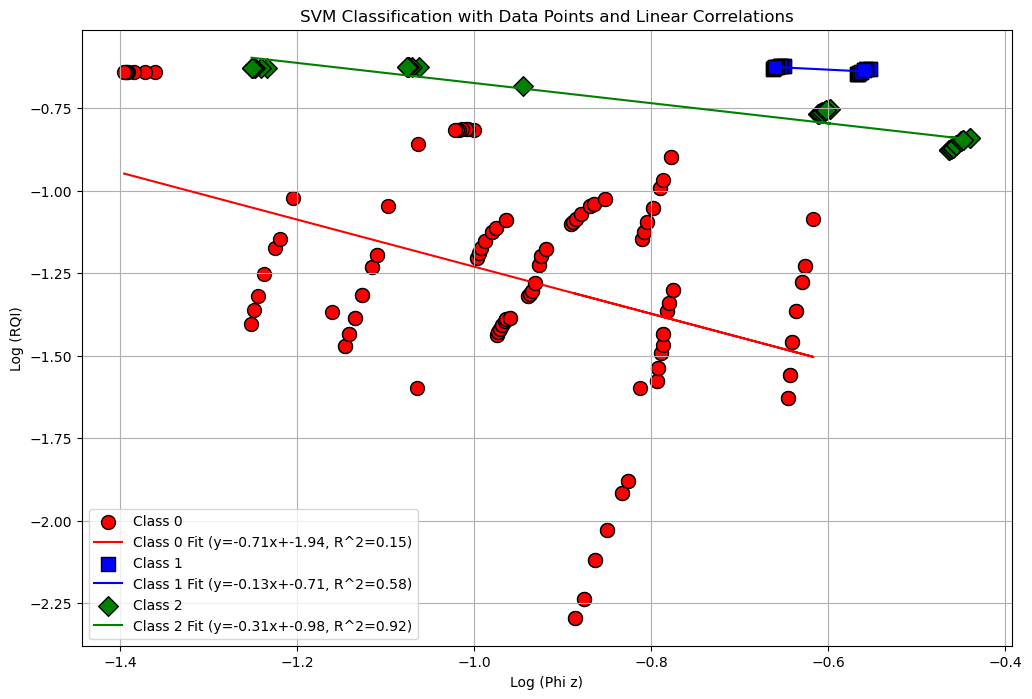

In [23]:
# Linear SVM for log (RQI) vs log (Phi z) for 3 clusters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import linregress

# Step 1: Load your data
file_path = 'Core plug dataset.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Step 2: Check and prepare the dataset
# Ensure 'Rock Type' is the target variable
if 'Rock Type' not in data.columns:
    raise ValueError("The dataset must have a 'Rock Type' column for classification.")

# Select features and target variable
X = data[['Log (Phi z)', 'Log (RQI)']]
y = data['Rock Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Train SVM Classifier
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_classifier.fit(X_train, y_train)

# Step 5: Make predictions and evaluate
y_pred = svm_classifier.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 6: Plot data points with linear correlations
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple']
markers = ['o', 's', 'D', '^']

# Plot original data points and linear regression for each cluster
for i, class_index in enumerate(np.unique(y)):
    mask = y == class_index
    porosity = X.loc[mask, 'Log (Phi z)']
    permeability = X.loc[mask, 'Log (RQI)']
    
    # Scatter plot
    plt.scatter(
        porosity,
        permeability,
        color=colors[i], 
        marker=markers[i], 
        edgecolor='k', 
        s=100, 
        label=f"Class {class_index}"
    )
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(porosity, permeability)
    line = slope * porosity + intercept
    plt.plot(porosity, line, color=colors[i], linestyle='-', label=f"Class {class_index} Fit (y={slope:.2f}x+{intercept:.2f}, R^2={r_value**2:.2f})")

plt.title('SVM Classification with Data Points and Linear Correlations')
plt.xlabel('Log (Phi z)')
plt.ylabel('Log (RQI)')
plt.legend()
plt.grid()
plt.show()


   Index Sample No Net Confining Stress (psi) Net Overburden pressure (psi)  \
0      1       47V                       6000                          9677   
1      2       47V                       6000                          9677   
2      3       47V                       4800                          7742   
3      4       47V                       4800                          7742   
4      5       47V                       3600                          5806   

  Bulk Volume (cc)  Pore Volume (cc)  Porosity  Identical Porosity values  \
0          56.1822            6.4611    0.1150                     0.1150   
1          56.1822            6.4611    0.1150                     0.1174   
2          56.3372            6.6161    0.1174                     0.1204   
3          56.3372            6.6161    0.1174                     0.1239   
4          56.5242            6.8031    0.1204                     0.1282   

   Frequency of porosity values  Relative Porosity (phi / phi 

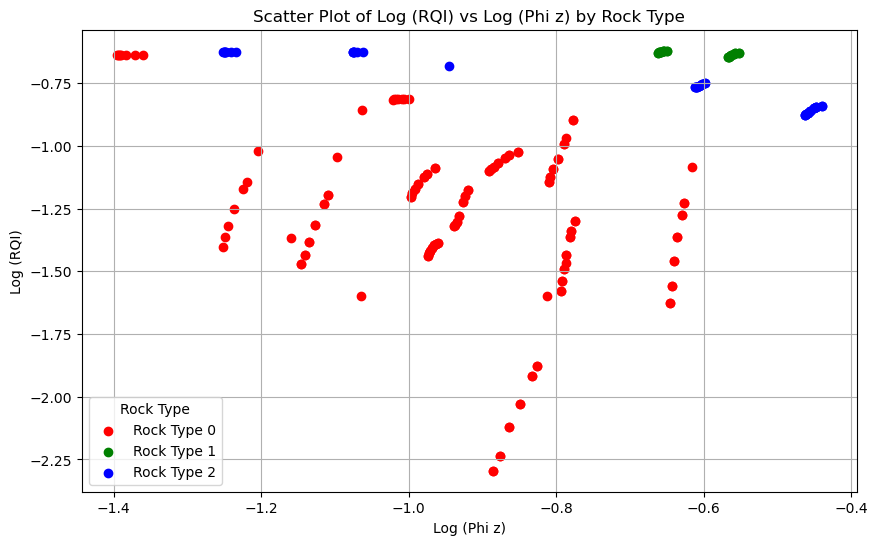

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("Core plug dataset.csv")

# Check the first few rows of the dataframe to understand its structure
print(df.head())

# Extract the relevant columns
x = df["Log (Phi z)"]
y = df["Log (RQI)"]
rock_type = df["Rock Type"]

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Define a color map for the rock types
color_map = {0: 'red', 1: 'green', 2: 'blue'}

# Plot each rock type with a different color
for rock in color_map.keys():
    plt.scatter(x[rock_type == rock], y[rock_type == rock], 
                color=color_map[rock], label=f'Rock Type {rock}')

# Add labels and title
plt.xlabel("Log (Phi z)")
plt.ylabel("Log (RQI)")
plt.title("Scatter Plot of Log (RQI) vs Log (Phi z) by Rock Type")

# Add a legend
plt.legend(title="Rock Type")

# Show the plot
plt.grid()
plt.show()
